In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [27]:
import pickle
from pathlib import Path

from object_detection import plot_bounding_box

In [26]:
root_dir = Path('/Users/deepakduggirala/Documents/Elephants-dataset-png')
class_name = '1001'
class_dir = root_dir / class_name

In [14]:
images = sorted([f for f in class_dir.iterdir() if f.suffix == '.png'])
json_file = class_dir / 'inference_simple_resize.pickle'

In [15]:
with open(json_file, 'rb') as f:
    inference_data = pickle.load(f)

In [28]:
inference_data.keys()

dict_keys(['boxes', 'scores', 'classes', 'valid_detections', 'metrics', 'accuracy'])

In [30]:
boxes = inference_data['boxes']
boxes.shape

(98, 100, 4)

In [157]:
img = plt.imread(images[-1])

In [ ]:
images[0].name

'IMG_0234.png'

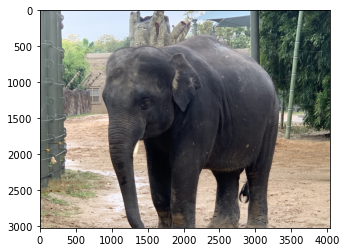

In [158]:
plt.imshow(img)

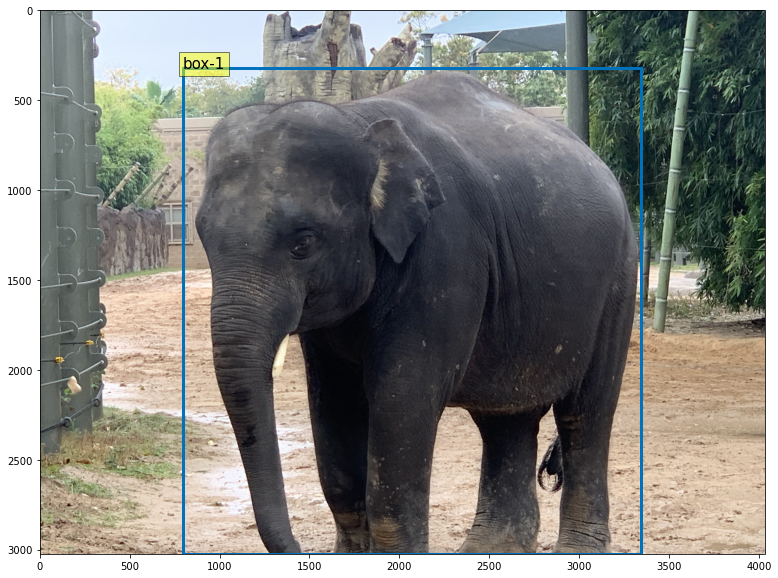

In [164]:
plot_bounding_box(img, boxes[-1, 0].reshape(1,-1), None, True)

In [69]:
def scale_box(box, scale):
    x1, y1, x2, y2 = box
    w,h = x2-x1, y2-y1
    xc, yc = (x1+x2)/2, (y1+y2)/2
    
    new_w, new_h = w*scale, h*scale
    
    return np.array((
        max(0,xc-new_w/2), 
        max(0, yc-new_h/2), 
        min(1,xc+new_w/2), 
        min(1, yc + new_h/2))
    )

In [165]:
scale_box(boxes[-1, 0], 1.1).reshape(1,-1)

array([[0.1661561 , 0.06239893, 0.86086984, 1.        ]])

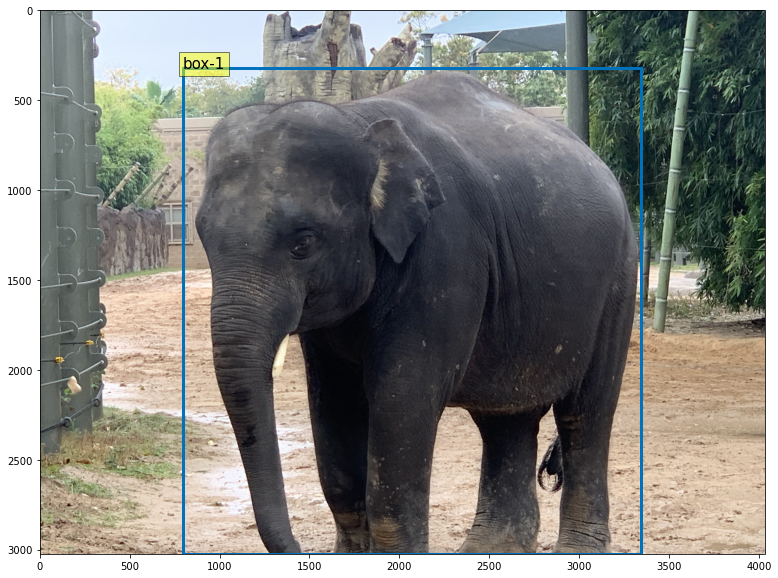

In [196]:
plot_bounding_box(img, scale_box(boxes[-1, 0], 1).reshape(1,-1), None, True)

In [197]:
img = cv2.imread(str(images[-1]))
w=640
img_r = cv2.resize(img, (w, int(w*(img.shape[0]/img.shape[1]))), interpolation = cv2.INTER_AREA)

In [198]:
H, W = img_r.shape[:2]
x1,y1,x2,y2 = scale_box(boxes[-1,0].flatten(), 1) * [W, H, W, H]
rect =list(np.array((x1, y1, x2-x1, y2-y1), dtype=np.int32))
rect

[126, 51, 404, 428]

In [199]:
mask = np.zeros(img_r.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

In [200]:
_ = cv2.grabCut(img_r,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

In [201]:
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img2 = img_r*mask2[:,:,np.newaxis]

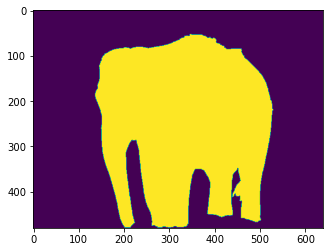

In [204]:
plt.imshow(mask2)

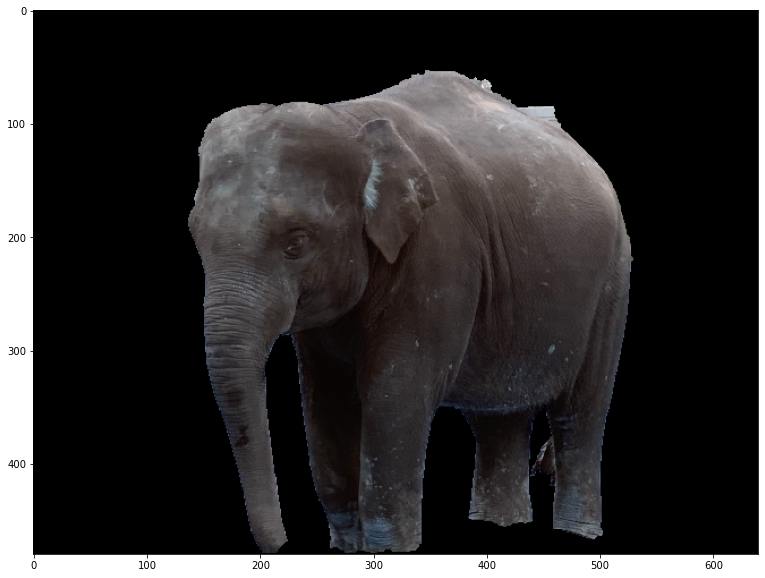

In [202]:
plt.figure(figsize=(16, 10))
plt.imshow(img2)